## Ejercicio 3

Estudiante: Rodrigo Mauricio Garcia Saenz

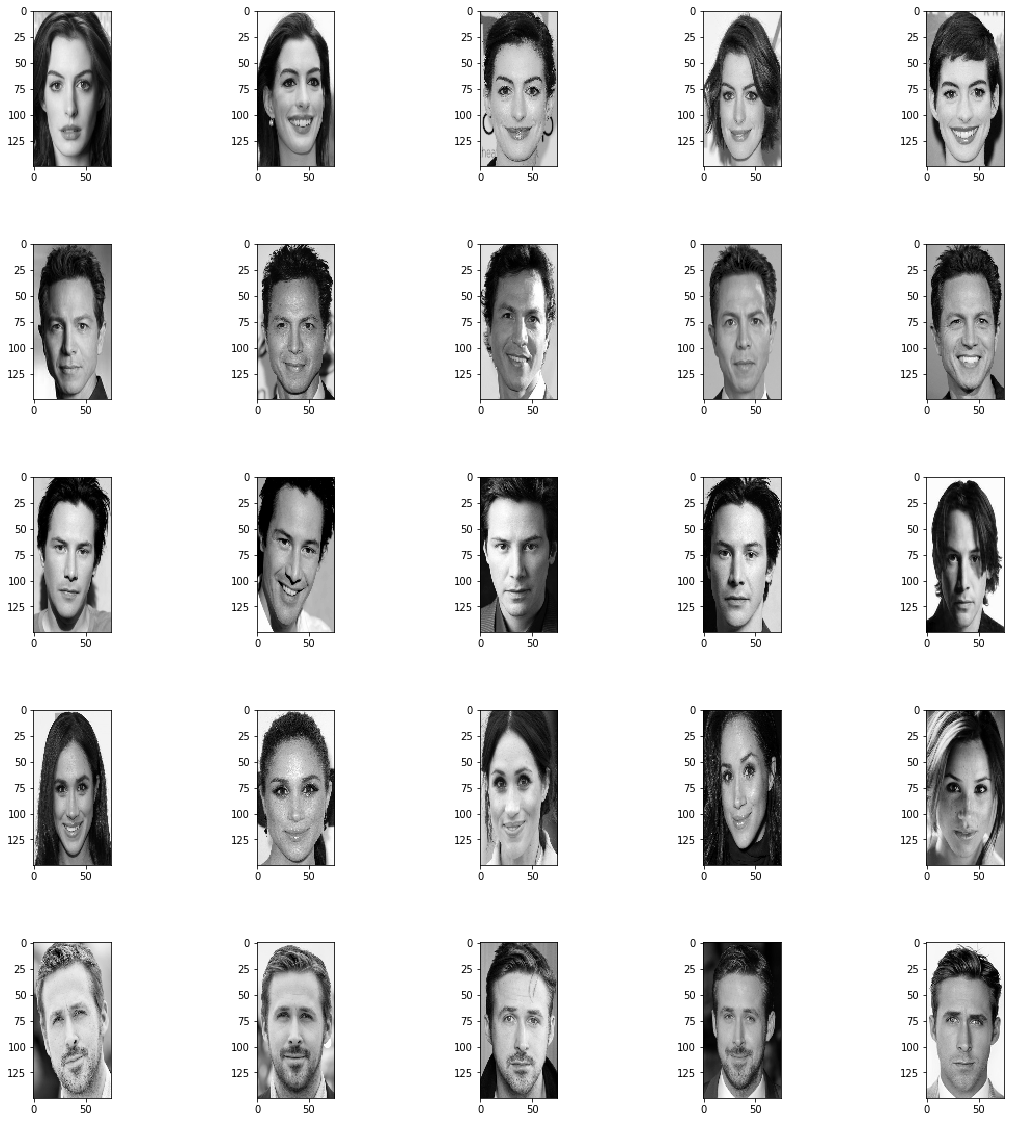

In [1]:
%matplotlib inline

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs


#Place all the images in the same directory as this script and do not change the name of the images.
#This part of the code uses opencv to load all the images.

#All the names for loading the images
names = ['Anne', 'benjamin', 'keanu', 'Markle', 'ryan']


img_dims = (75,150)  #dim = (width, height)
Nim=5  #Number of images per person in the dataset

#Load all the images from the files into a dictionary "images"
images = {}
for name in names:
    image_set = []
    for i in range(1,Nim+1):
        filename = name + str(i) + '.jpg'
        img = cv2.imread(filename.format(name,i), 0)
        image_set.append(img)
    images['{}'.format(name)] = image_set

# Plot all the images
fig, axs = plt.subplots(5,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()


#Resize all the images into a dictionary "resized_images"
cont=0
resized_images = {}
for n in names:
    image_set = []
    for i in range(Nim):
        img = cv2.resize(images[n][i], img_dims)
        image_set.append(img)
        axs[cont].imshow(img,cmap='gray')
        cont=cont+1
    resized_images['{}'.format(n)] = image_set

In [2]:
# Create Data matrix A each row represent an image
A = np.zeros((len(names)*Nim,              # 5*5 = 25 
              img_dims[0]*img_dims[1] # alto x ancho
             ))
nimg = 0
for person, image_set in resized_images.items():
    for image in image_set:
        # convirtiendo en vector
        A[nimg] = np.asarray(image).reshape(-1)
        nimg += 1

#Averages of each image
a = {}

ancho = img_dims[0]
alto = img_dims[1]

for i in range(Nim):
    personaNombre = names[i%Nim]
    # imagen promedio vacia al principio
    a[personaNombre] = np.zeros(alto * ancho)
    
    for npixel in range(A.shape[1]):
        suma = 0
        # imagen de cada persona
        for j in range(i*Nim, (i*Nim)+Nim):
            suma += A[j][npixel]
        promedio = suma/Nim
        a[personaNombre][npixel] = promedio
    #a[personaNombre] = a[personaNombre].reshape(alto, ancho)

In [3]:
# mostrando las imágenes promedio
fig, axs = plt.subplots(1,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

cont = 0
for persona, imagen in a.items():
    axs[cont].imshow(imagen.reshape(alto, ancho),cmap='gray')
    cont += 1

In [4]:
#Find the 20 largest eigenvalues of the correlation matrix
#Use comand: D, V = eigs(C, k=20) where C is your correlation matrix
#Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html
n,m = A.shape
C = (A.T @ A)
print(C.shape)

#print(C)
D, V = eigs(C, k=20)

# Ordenando descendentemente los eigen vectores y eigen values
idx = D.argsort()[::-1] # obteniendo los indices para ordenar
# Obteniendo de manera ordenada
D = D[idx]    
V = V[:, idx]

print('D:', D.shape)
print('V:', V.shape)

(11250, 11250)
D: (20,)
V: (11250, 20)


/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


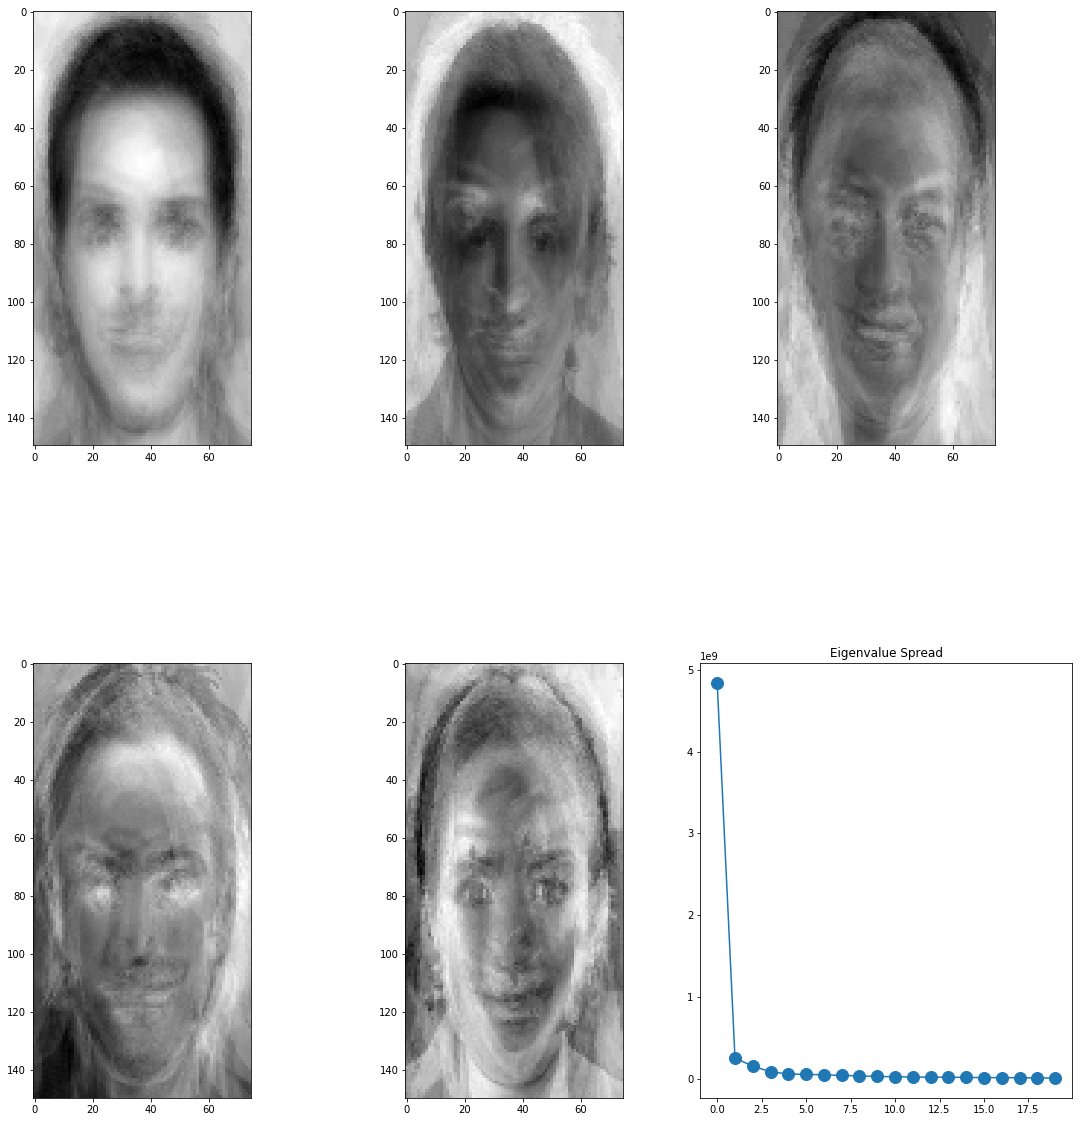

In [5]:
# Mostrando los primeros 5 eigenvectors (eigenfaces)
fig, axs = plt.subplots(2,3, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(5):
    axs[i].imshow(V[:, i].real.reshape(alto, ancho),cmap='gray')
ax = axs[5]
ax.set_title('Eigenvalue Spread')
ax.plot(D, marker="o", markersize=12)

In [6]:
A[0].T.shape
#A[0].T @ V[:, 1].T

(11250,)

In [7]:
#Representing Faces onto Basis. 
# Display reconstruction for K =  [1, 5, 10, 15, 20]

K =  [1, 5, 10, 15, 20]
iface = 7

def reconstructImage(dataImage, eigenVectors, K):
    ''' Devuleve un diccionario con las Imagenes reconstruidas haciendo la combinacion lineal
    de la imagen de datos con los eigen vectors segun la lista K.
    - param dataImage (numpyArray)
    - param eigenVectors (lista de numpyArray)
    - param K (list): ejemplo [1,5,10]
    - returns (dict): ejemplo { 1: numpyArray}
    '''
    results = {}
    for k in K:
        # los primeros k elmentos
        results[k] = np.zeros(dataImage.T.shape) # inicializando
        for i in range(k):
            w_j = eigenVectors[:, i].T @ dataImage.T
            results[k] += w_j.real * eigenVectors[:, i].real
    return results

results = reconstructImage(A[iface], V, K)

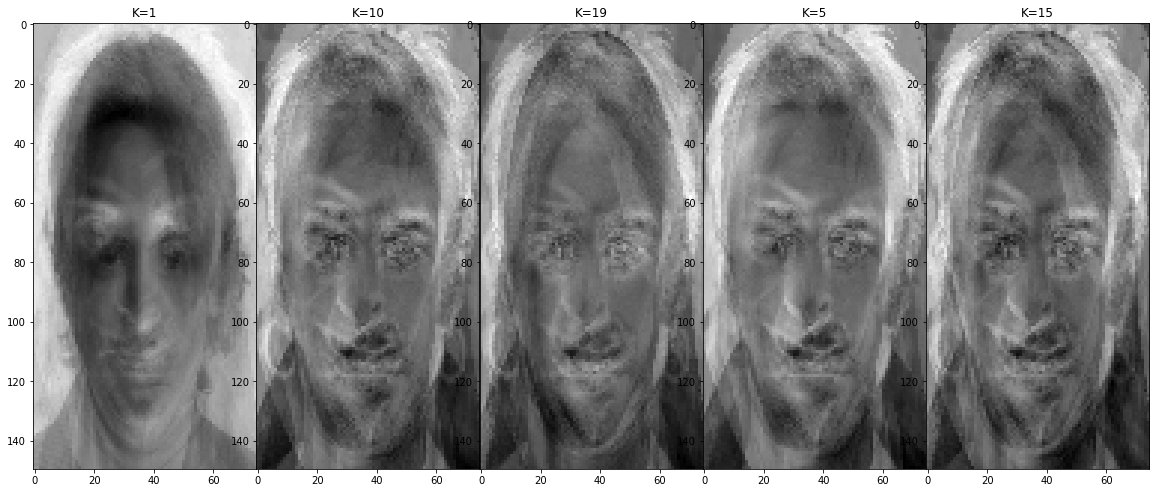

In [16]:
# mostrando los resultados
fig, axs = plt.subplots(1,len(K), figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

cont = 0
for k, imagen in results.items():
    axs[cont].set_title('K='+str(k))
    axs[cont].imshow(imagen.reshape(alto, ancho), cmap='gray')
    cont += 1

In [18]:
# Take a picture of you and change the name of the picture to "Me.jpg"
# Place a picture of you in the same directory as this script.

# This part of the code should load your picture as a 1D vector.
me = cv2.resize(cv2.imread('Me.jpg', 0), img_dims).reshape(1,-1)   # -1 is that it will figure it out later
print(me.shape)

# Reproduce results of the the projection of your image onto the eigenvector space
Cme = (me.T @ me) / 1
print(Cme.shape)
Dme, Vme = eigs(Cme, k=20)
idx = Dme.argsort()[:-1]
Dme = Dme[idx]
Vme = V[:, idx]
print(Dme.shape)
print(Vme.shape)

(1, 11250)
(11250, 11250)
(19,)
(11250, 19)


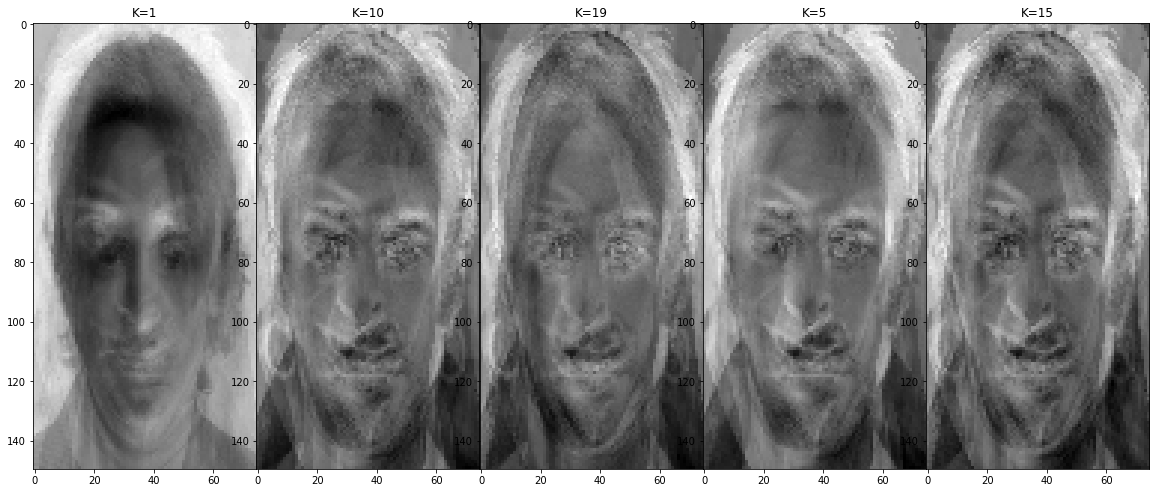

In [19]:
# Recostruct your image
K =  [1, 5, 10, 15, 19]
results = {}
for k in K:
    # los primeros k elmentos
    results[k] = np.zeros(me.shape) # inicializando
    for i in range(k):
        w_j = Vme[:, i].T @ me.T
        results[k] += w_j.real * Vme[:, i].real

fig, axs = plt.subplots(1, len(K), figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

cont = 0
for k, imagen in results.items():
    axs[cont].set_title('K='+str(k))
    axs[cont].imshow(imagen.reshape(alto, ancho), cmap='gray')
    cont += 1

In [20]:
Pa = {}

fig, axs = plt.subplots(1,5, figsize=(15, 5))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

# proyectando sobre las imagenes promedio
cont  = 0
for persona, imagen in a.items():
    Pa[persona] = imagen.real @ V.real
    axs[cont].set_title(persona)
    axs[cont].hist(Pa[persona], bins=30, label=persona)
    cont += 1

In [21]:
# proyectando imagen nueva con los vectores propios de las otras imágenes
p = me @ V
# reconstruyendo
xEstimado = V @ p.T
print('p:', p.shape)
print('xEstimado:', xEstimado.shape)

plt.imshow(xEstimado.real.reshape(alto, ancho), cmap='gray')

p: (1, 20)
xEstimado: (11250, 1)


Name --> Error Projection
Markle : 0.6927245043704812
benjamin : 0.6565817876568657
Anne : 0.6908144028517228
ryan : 0.7427517334460764
keanu : 0.7011806384147594


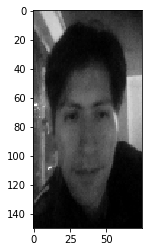

In [22]:
# Compute the error of the projection with respect to each image in the Dataset

E = {}
for i, persona in enumerate(names):
    E[persona] = []
    for j in range(i*Nim, (i*Nim)+Nim):
        oV = A[j] @ V
        e = np.linalg.norm(oV - p) / np.linalg.norm(oV)
        E[persona].append(e)
        
# Useful comands: plt.bar() donde ||Algo|| es la norma de Algo. 
plt.imshow(me.real.reshape(alto, ancho), cmap='gray')

fig, axs = plt.subplots(1,5, figsize=(15, 5))
fig.subplots_adjust(hspace = .7, wspace=.3)
axs = axs.ravel()

cont = 0
print('Name --> Error Projection')
for persona, errProjection in E.items():
    axs[cont].set_title(persona)
    axs[cont].bar(range(1, len(names)+1), errProjection)
    print(persona, ':', np.mean(errProjection))
    cont += 1

La proyección de error promedio más baja entre mi foto y la de las demás fotos de personas es con Markle, entonces esta técnica indica que mi rostro tiene el mayor parecido con Markle y el menor parecido con benjamin. Quizá por que la foto mía tiene una cantidad importante de tonos oscuros por la poca iluminación ha influido en la proyección al multiplicarse matricialmente con los vectores propios del conjunto de imágenes encontrada.